In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Maria Jose Jaimes

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



0.01990154067842198
0.0049731338310721185
0.0012431427870041034
0.0003107769054722098
7.769367702081809e-05
1.942338460736437e-05
4.855843407369775e-06
1.2139617311390793e-06
3.0349273316687686e-07
7.586667294390281e-08
1.8959589453970693e-08
4.753282212277554e-09


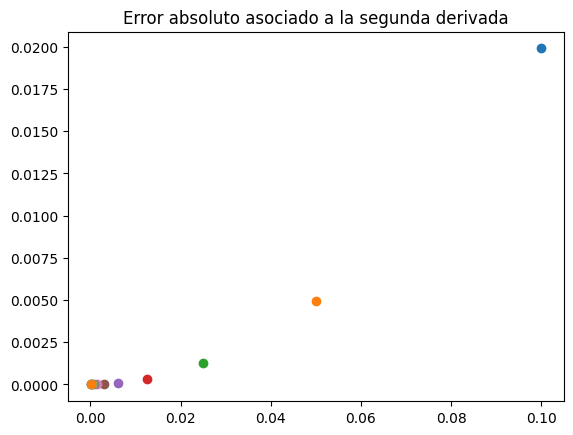

In [122]:
# Aquí va su código
f = lambda x: 3**x
df_exacta = lambda x: 3**x * np.log(3)

def derivada(f, x, tol = 1e-8):
    '''
    Encuentra el valor de la derivada de una funcion en un punto
    Entrada:
        f: funcion
        x: punto que se quiere conocer
    Salida:
        valor_derivada: valores de la derivada calculados
        h_valores: pasos de discretización utilizados
    '''
    h = 0.1
    h_valores = []
    valor_derivada = []
    anterior = 9999
    nueva = (f(x+h)-f(x-h))/(2*h)
    while abs(nueva-anterior)>tol:
        h_valores.append(h)
        valor_derivada.append(nueva)
        h /= 2
        anterior = nueva
        nueva = (f(x+h)-f(x-h))/(2*h)

    return valor_derivada, h_valores


df, h_val = derivada(f, 2)

plt.title('Error absoluto asociado a la segunda derivada')
for i in range(len(df)):
    error= abs(df_exacta(2)-df[i])
    print(error)
    plt.scatter(h_val[i], error)



## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



La expresion para el polinomio interpolador de Lagrange para v(r) es:
             5             4            3     2
-2.132e-13 x + 3.979e-13 x - 1.99e-13 x - 2 x - 2.398e-14 x + 2

La derivada correspondiente al gradiete de velocidad radial es:
 [-0.23157899 -0.23157912 -0.23157949 ... -3.76842051 -3.76842088
 -3.76842101]


Text(0, 0.5, 'esfuerzo cortante')

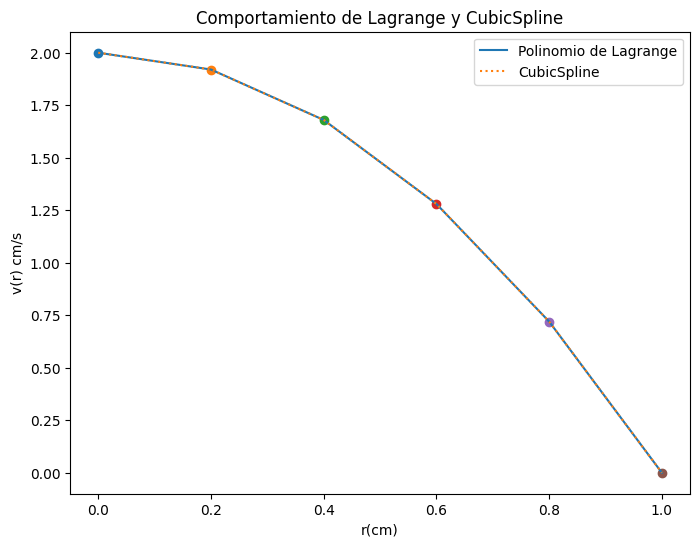

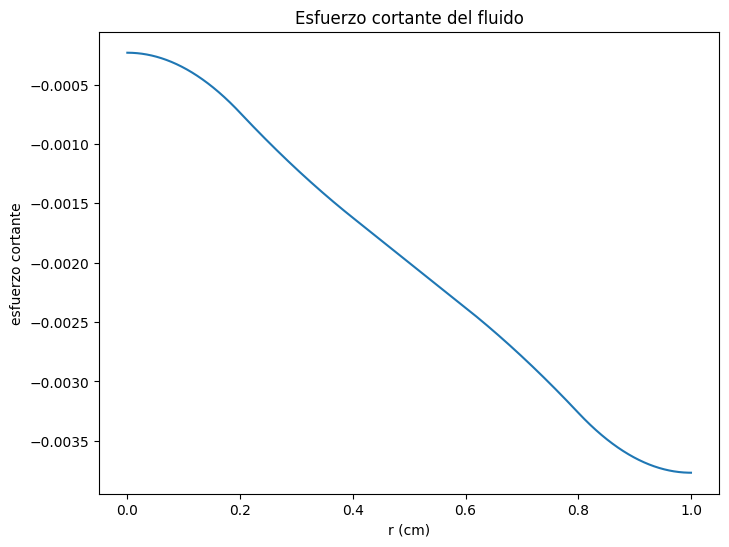

In [120]:
r = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
vr = [2.00, 1.92, 1.68, 1.28, 0.72, 0.00]
r_graf = np.linspace(0.0, 1.0,100)

# a. Polinomio interpoldaor de Lagrange
pol_lagrange = lagrange(r, vr)
print('La expresion para el polinomio interpolador de Lagrange para v(r) es:\n', pol_lagrange)
cubic = CubicSpline(r, vr, bc_type='natural')

# b. 
plt.figure(figsize=(8,6))
plt.title('Comportamiento de Lagrange y CubicSpline')
plt.xlabel('r(cm)')
plt.ylabel('v(r) cm/s')
plt.plot(r, pol_lagrange(r), label='Polinomio de Lagrange')
plt.plot(r, cubic(r),':', label='CubicSpline')
for i in range(len(r)):
    plt.scatter(r[i],vr[i])
plt.legend()

# c.
h= 1e-4
r= np.arange(0, 1+h, h)
grad_velrad = np.gradient(cubic(r), h)

print('\nLa derivada correspondiente al gradiete de velocidad radial es:\n', grad_velrad)

# d.
mu = 0.001 # Pa
esfuerzo_cortante=[]

plt.figure(figsize=(8,6))
plt.title('Esfuerzo cortante del fluido')
for i in range(len(grad_velrad)):
    esf = mu*grad_velrad[i]
    esfuerzo_cortante.append(esf)

plt.plot(r, esfuerzo_cortante)
plt.xlabel('r (cm)')
plt.ylabel('esfuerzo cortante')

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [ ]:
# Aquí va su código
tplquad